In [20]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1 

In [21]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    
    return ((p[0]-q[0])**2+(p[1]-q[1])**2)**0.5

In [22]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    dist_pq = _dist(p,q)
    if dist_pq <= eps:
        return True
    else:
        return False

In [23]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    p = [m[0,point_id],m[1,point_id]]
    for i in range(n_points):
        if i != point_id:
            q = [m[0,i],m[1,i]]

            if  _eps_neighborhood(p,q,eps) == True:
                seeds.append(i)

    return seeds

In [ ]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below


In [24]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN  
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 0
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    
    # N: neighbors
    # for each point P in database DB
    for i in range(n_points):
        if classifications[i] == False:
            N = _region_query(m, i, eps)

            if len(N) < min_points:
                classifications[i] = NOISE
                
            else:
                cluster_id +=1
                classifications[i] == cluster_id
                Seed = N

                for Q in Seed:
                    if classifications[Q] == NOISE:
                        classifications[Q] = cluster_id
                    elif classifications[Q] == False:
                        classifications[Q] = cluster_id
                        N = _region_query(m, Q, eps)
                        if len(N) >= min_points:
                            Seed.extend(N)

    return classifications

In [25]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()
m

matrix([[ 8.62218539e+00, -4.73670958e+00,  9.62122205e+00,
          6.16209503e+00,  8.69748809e+00, -4.63572796e+00,
          6.61651316e+00, -7.02764163e+00,  6.15992460e+00,
          8.76490767e+00, -5.15793071e+00,  7.21333689e+00,
          8.25505789e+00,  7.37956248e+00,  5.94205586e+00,
          7.88357143e+00,  7.82944816e+00, -5.26628506e+00,
          7.14461054e+00,  6.34681473e+00,  4.97085043e+00,
          7.89167201e+00,  8.36186598e+00, -6.21249923e+00,
          7.66935965e+00, -7.06211127e+00, -6.00427762e+00,
         -5.58416523e+00, -5.19006610e+00, -6.11585647e+00,
         -6.27561159e+00, -4.50456580e+00, -4.19748454e+00,
          8.77691408e+00, -5.68745191e+00,  7.86194063e+00,
          7.23721887e+00, -4.97003024e+00,  5.86749807e+00,
          6.17357365e+00,  1.00261658e+01, -4.93281771e+00,
         -4.74360459e+00,  8.47143046e+00,  6.10723361e+00,
         -5.80639301e+00, -3.76682945e+00,  5.50541310e+00,
         -3.90612188e+00,  7.74404021e+0

In [26]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

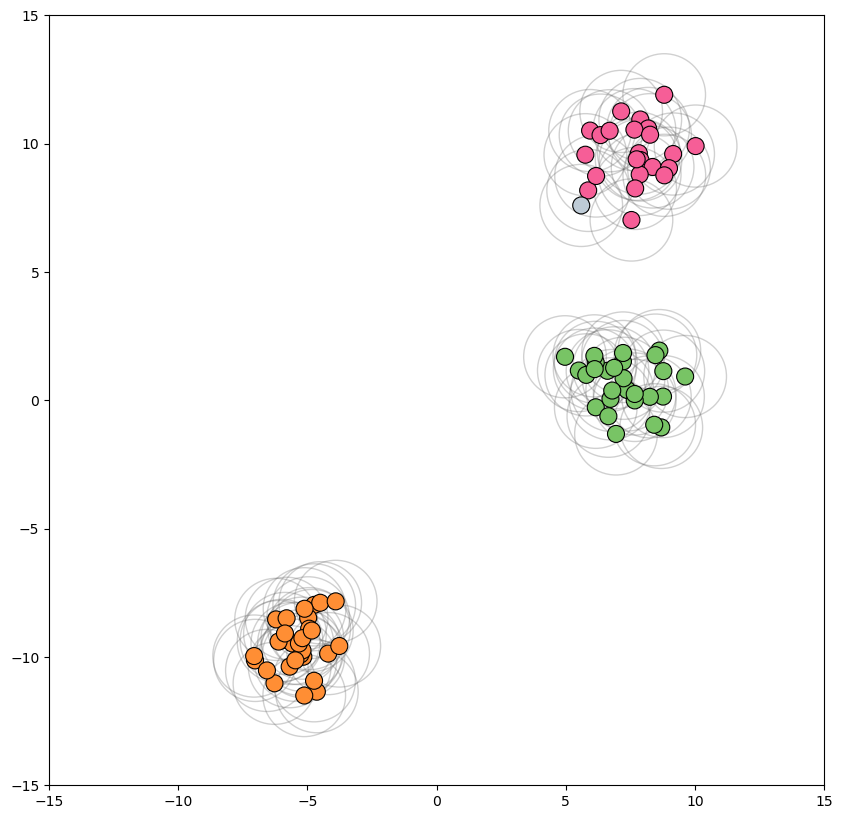

In [27]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [28]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [29]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

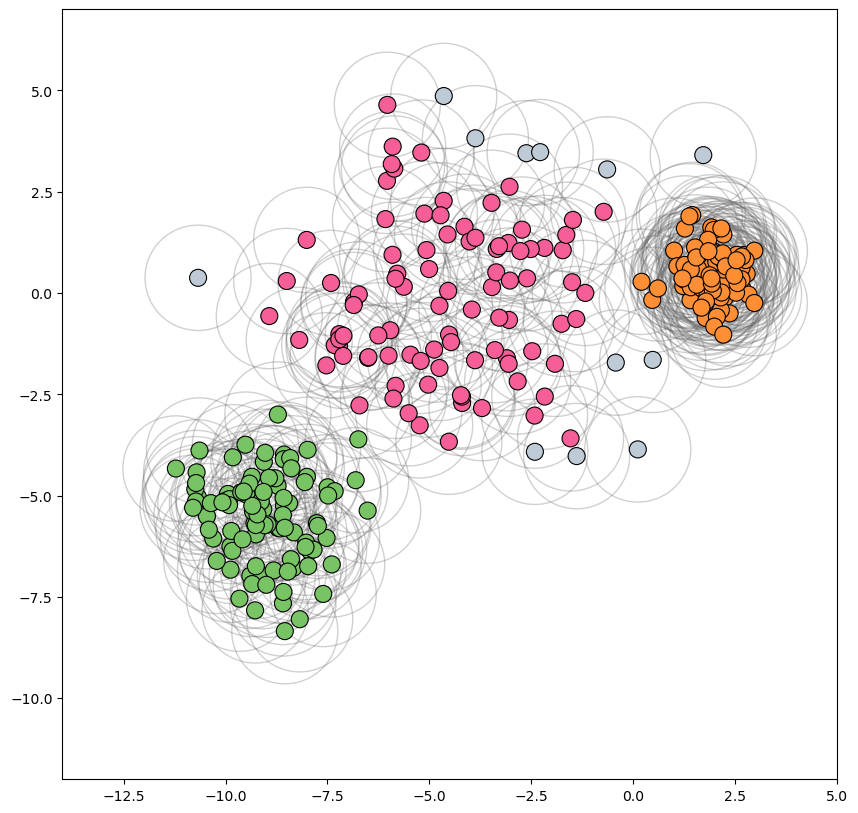

In [30]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
